In [ ]:
import matplotlib.pyplot as plt
import random 
import csv
import numpy as np
import cv2
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pandas as pd
import math

# Visualizations will be shown in the notebook.
%matplotlib inline

lines = []
center_angle = 0
center_angle_o = 0
centerAngleImgCount = 0
angleCol = np.zeros((10, 1000, 1))
rowCount = 0
scopeIndex = 0 #index for that section

with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    
    for line in reader:
        if line[3] == 'steering':
            continue
        center_angle = round(float(line[3]), 2)
        center_angle_o = line[3]
        if centerAngleImgCount > 1500 and center_angle == 0:
            continue
        elif center_angle == 0:
            centerAngleImgCount += 1
        
        lines.append(center_angle)
        
        if (center_angle >= .50 and center_angle <= .60):
            #count = 7
            scopeIndex = 0
            lastItemIndex = int(angleCol[scopeIndex])
            angleCol[scopeIndex] += 1 #total item count at this index
            angleCol[scopeIndex][lastItemIndex] = center_angle_o #random steering angle value
            angleCol[scopeIndex] += 1
            angleCol[scopeIndex][0][0] = rowCount #keeping reference to lines array index for this item
        elif (center_angle >= .30 and center_angle <= .40):
            #count = 5
            scopeIndex = 1
            
            lastItemIndex = int(angleCol[scopeIndex])
            angleCol[scopeIndex] += 1 #total item count at this index
            angleCol[scopeIndex][lastItemIndex] = center_angle_o #random steering angle value
            angleCol[scopeIndex] += 1
            angleCol[scopeIndex][0][0] = rowCount
            
        elif (center_angle >= .20 and center_angle <= .30):
            #count = 4   
            scopeIndex = 2           
            
            lastItemIndex = int(angleCol[scopeIndex])
            angleCol[scopeIndex] += 1 #total item count at this index
            angleCol[scopeIndex][lastItemIndex] = center_angle_o #random steering angle value
            angleCol[scopeIndex] += 1
            angleCol[scopeIndex][0][0] = rowCount
        elif (center_angle >= .10 and center_angle <= .20):
            #count = 3
            scopeIndex = 3
            
            lastItemIndex = int(angleCol[scopeIndex])
            angleCol[scopeIndex] += 1 #total item count at this index
            angleCol[0][lastItemIndex] = center_angle_o #random steering angle value
            angleCol[scopeIndex] += 1
            angleCol[scopeIndex][0][0] = rowCount
        elif (center_angle <= -.01 and center_angle >= -.10):
            #count = 3
            scopeIndex = 4
            
            lastItemIndex = int(angleCol[scopeIndex])
            angleCol[scopeIndex] += 1 #total item count at this index
            angleCol[0][lastItemIndex] = center_angle_o #random steering angle value
            angleCol[scopeIndex] += 1
            angleCol[scopeIndex][0][0] = rowCount
        elif (center_angle <= -.10 and center_angle >= -.25):
            #count = 6
            scopeIndex = 5
                        
            lastItemIndex = int(angleCol[scopeIndex])
            angleCol[scopeIndex] += 1 #total item count at this index
            angleCol[scopeIndex][lastItemIndex] = center_angle_o #random steering angle value
            angleCol[scopeIndex] += 1
            angleCol[scopeIndex][0][0] = rowCount
        elif (center_angle <= -.25 and center_angle >= -.35):
            #count = 8
            scopeIndex = 6
            
            lastItemIndex = int(angleCol[scopeIndex])
            angleCol[scopeIndex] += 1 #total item count at this index
            angleCol[scopeIndex][lastItemIndex] = center_angle_o #random steering angle value
            angleCol[scopeIndex] += 1
            angleCol[scopeIndex][0][0] = rowCount
        elif (center_angle <= -.35 and center_angle >= -.45):
            #count = 10
            scopeIndex = 7
                        
            lastItemIndex = int(angleCol[scopeIndex])
            angleCol[scopeIndex] += 1 #total item count at this index
            angleCol[scopeIndex][lastItemIndex] = center_angle_o #random steering angle value
            angleCol[scopeIndex] += 1
            angleCol[scopeIndex][0][0] = rowCount
        
        rowCount += 1
        #for x in range (0, count):
         #   lines.append(center_angle)

#skipping the headers
#lines = lines[1:]                     
n_angles = len(lines)
#print (lines)
#plt.hist(lines, n_angles)
#plt.show()
print ()
start = 0
min =0
max = 0
stop = np.amax(angleCol[0::])
#print(angleCol[0::])
print (stop)
for i in range(len(angleCol)):
    start = angleCol[i]
    min = np.amin(angleCol[:1:])
    max = np.amax(angleCol[:1:])
    for j in (start, stop):
        angleCol[i][j] = random.uniform(min, max)

def print_train_labels():
    print()
    print("Samples distribution:")
    print("%-50s%-32s" % ("Label", "|Count"))
    histogram = np.histogram(lines, bins=np.arange(9000))
    for i in range(len(histogram[0])):
        print("%-50s|%-32d" % (lines[histogram[1][i]], histogram[0][i]))


#print_train_labels()
#lines = lines.reshape((lines.shape[0],)) 

    
#ax = pd.DataFrame({'X':lines, 'Y':lines}).plot()

plt.hist(lines, bins= 50, color= 'red')
plt.xlabel('steering value')
plt.ylabel('counts')

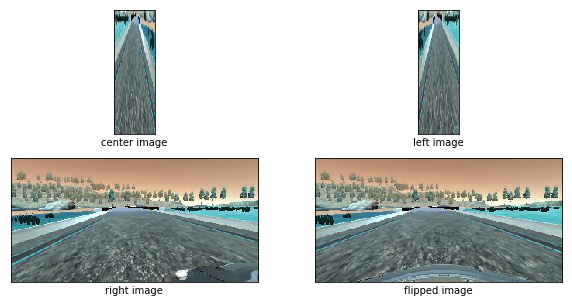

In [8]:
import matplotlib.pyplot as plt
import random 
import csv
import numpy as np
import cv2
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pandas as pd
import math

# Visualizations will be shown in the notebook.
%matplotlib inline


fileName1 = "./data/IMG/center_2016_12_01_13_32_45_275.jpg"
fileName2 = "./data/IMG/left_2016_12_01_13_32_45_275.jpg"
fileName3 = "./data/IMG/right_2016_12_01_13_32_45_275.jpg"


def normalize(image):
    #return (image/255 - 0.5)
    return image / 127.5 - 1

def blur(img, kernel_size):
    return cv2.blur(img, (kernel_size, kernel_size))

def cropImage(img):
    return img[60:140, :, :] #height, width, color channels

def resizeImage(img):
    #cv2.resize(img, (cols (width), rows (height)))
    img = cv2.resize(img, (66, 200))
    return img

def rgb2yuv(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    return image

def flipVertical(image):
    image = cv2.flip(image, 1)
    return image

def hsv(image):
    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    #print (image.shape)
    return image


def preprocessImage(img):
    #cv2.resize(img, (cols (width), rows (height)))
    ##img = cv2.resize(img, (200, 60))
    # img = cv2.resize(img, (80,40))
    # img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    # img = img[15:40, 0:80]
    # #print (image.shape)
    # return img[:,:,1]
    # B,G,R channels of image index. We are locating grey channel 
    # #http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_core/py_basic_ops/py_basic_ops.html -  image array 3 channel index   
    #img[:, :, 2] = img[:, :, 2] * brightness
    #img = normalize(blur(hsv(img)[:,:,1], kernel_size=5))
    #img = blur(hsv(img)[:,:,1], kernel_size=5)
    ##img = blur(img, kernel_size=5)
    croppedImage = cropImage(img)
    resizedImage = resizeImage(croppedImage)
    #rgb2yuved = rgb2yuv(resizedImage)
    hsved = hsv(resizedImage)[:,:,1]
    blurred = blur(hsved, 5)
    processedImg = blurred
    return processedImg

center_image = cv2.imread(fileName1)
left_image = cv2.imread(fileName2)
right_image = cv2.imread(fileName3)

flipped_image = np.fliplr(center_image)

croppedImage = cropImage(right_image)


center_image = resizeImage(croppedImage)
#resizedImage = resizeImage(croppedImage)
#rgb2yuved = rgb2yuv(resizedImage)
#hsved = hsv(resizedImage)
#right_image =hsved
right_image = flipVertical(right_image)

#right_image = cv2.resize(right_image, (80,40))
#right_image = right_image[15:40, 0:80]
#right_image = right_image[10:20,:,:]



fig = plt.figure(figsize=(10,5))

axis = fig.add_subplot(2,2,1)
axis.set_xlabel('center image')
plt.xticks(np.array([]))
plt.yticks(np.array([]))
axis.imshow(center_image)


axis = fig.add_subplot(2,2,2)
axis.set_xlabel('left image')
plt.xticks(np.array([]))
plt.yticks(np.array([]))
axis.imshow(cv2.flip(center_image,1))

axis = fig.add_subplot(2,2,3)
axis.set_xlabel('right image')
plt.xticks(np.array([]))
plt.yticks(np.array([]))
axis.imshow(right_image)

axis = fig.add_subplot(2,2,4)
axis.set_xlabel('flipped image')
plt.xticks(np.array([]))
plt.yticks(np.array([]))
axis.imshow(flipped_image)



712
1176
1676
here
5028


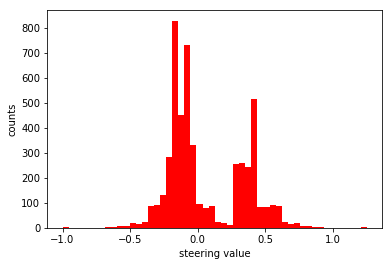

In [9]:
import matplotlib.pyplot as plt
import random 
import csv
import numpy as np
import cv2
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pandas as pd
import math
from sklearn.utils import shuffle

#right approach - current

# Visualizations will be shown in the notebook.
%matplotlib inline

lines = []
lines1 = []
linesfull = []
center_angle = 0
center_angle_o = 0
centerAngleImgCount = 0
angleCol = np.zeros((10, 1000, 1))
rowCount = 0
scopeIndex = 0
steering = []
steering_o = []
unique_steering = []
steering_dict = {}
angleZeroImages = []
angleNonZeroImages = []

with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    
    for line in reader:
        if line[3] == 'steering':
            continue
        if float(line[3]) < .01:
            continue
        center_angle = float(line[3])
        #center_angle = float(line[3])
        if center_angle >= -0.1 and center_angle <= 0.1:
            angleZeroImages.append(center_angle)
        else:
            angleNonZeroImages.append(center_angle)
            
        #steering_o.append(line[3])
        #if centerAngleImgCount > 500 and center_angle >= -0.02 and center_angle <= 0.01:
        #            continue
        #elif center_angle >= -0.02 and center_angle <= 0.01:
        #    centerAngleImgCount += 1
        
        #lines.append(center_angle)
        #linesFull.append(center_angle)
        #steering.append(center_angle)
        


shuffle(angleZeroImages)
print (len(angleZeroImages))
print (len(angleNonZeroImages))
shuffle(angleNonZeroImages)
lines = angleZeroImages[0:500]
lines.extend(angleNonZeroImages[0:2200])
lines2 =[]
    #uniq_steering = []
    #unique_steering = np.unique(steering)
    #unique_steering = np.unique(steering_o)
    #for i in range(len(unique_steering)):
        #steering_dict[str(unique_steering[i])] += 1
        #print(len(steering[unique_steering[i]]))
print(len(lines))
#plt.hist(lines, bins= 50, color= 'red')
#plt.xlabel('steering value')
#plt.ylabel('counts')
print('here')
#print(len(lines)) current

for i in range(len(lines)):
   
    center_angle = float(lines[i])                    

    #images.append(center_image)
    #angles.append(center_angle)
    #lines2.append(center_angle)
    #lines2.append(center_angle)
    #if(center_angle > .15 or center_angle < -.15):
        #images.append(flipVertical(center_image))
        #angles.append(-center_angle)
    lines2.append(-center_angle)
        #center_angle >= 0.01 or center_angle <= -.01
    correction = 0.25 # this is a parameter to tune

        #left

        #left_angle = float(center_angle) + correction

        #if (center_angle >= 0.01 or center_angle <= -.01):
        #images.append(left_image)
        #angles.append(left_angle)
        #lines2.append(left_angle)
        #left flipped                    
        #images.append(np.fliplr(left_image))
        #angles.append(-left_angle)

        #images.append(np.fliplr(left_image))
        #angles.append(-left_angle)
        #print ('ca-')
        #print (center_angle)
        #print ('--')
        #print (0.01*random.uniform(2, 3.5))
    #if(center_angle > .10 or center_angle < -.10):
    lines2.append(center_angle + correction)

        # right images, stripping starting space
        #imagesPaths.append(imagesPathsAll[i][2].replace(" ", ""))
        # randomly adding angles for right images
    lines2.append(center_angle - correction)

    
    #right_angle = float(center_angle) - correction
    #images.append(right_image)
    #angles.append(right_angle)
    #ines2.append(right_angle)
    

#lines2.extend(lines)
#lines2.extend(lines2)
print(len(lines2))
plt.hist(lines2, bins= 50, color= 'red')
plt.xlabel('steering value')
plt.ylabel('counts')

In [ ]:
import matplotlib.pyplot as plt
import random 
import csv
import numpy as np
import cv2
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pandas as pd
import math
from sklearn.utils import shuffle

#right approach

# Visualizations will be shown in the notebook.
%matplotlib inline

lines = []
lines1 = []
linesfull = []
center_angle = 0
center_angle_o = 0
centerAngleImgCount = 0
angleCol = np.zeros((10, 1000, 1))
rowCount = 0
scopeIndex = 0
steering = []
steering_o = []
unique_steering = []
steering_dict = {}
angleZeroImages = []
angleNonZeroImages = []

with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    
    for line in reader:
        if line[3] == 'steering':
            continue
        center_angle = round(float(line[3]), 2)
        #center_angle = float(line[3])
        if center_angle >= -0.1 and center_angle <= 0.1:
            angleZeroImages.append(center_angle)
        else:
            angleNonZeroImages.append(center_angle)
            
        #steering_o.append(line[3])
        #if centerAngleImgCount > 500 and center_angle >= -0.02 and center_angle <= 0.01:
        #            continue
        #elif center_angle >= -0.02 and center_angle <= 0.01:
        #    centerAngleImgCount += 1
        
        #lines.append(center_angle)
        #linesFull.append(center_angle)
        #steering.append(center_angle)
        


shuffle(angleZeroImages)
print (len(angleZeroImages))
print (len(angleNonZeroImages))
shuffle(angleNonZeroImages)
lines = angleZeroImages[0:500]
lines.extend(angleNonZeroImages[0:2000])
lines2 = []
    #uniq_steering = []
    #unique_steering = np.unique(steering)
    #unique_steering = np.unique(steering_o)
    #for i in range(len(unique_steering)):
        #steering_dict[str(unique_steering[i])] += 1
        #print(len(steering[unique_steering[i]]))
print(len(lines))
#plt.hist(lines, bins= 50, color= 'red')
#plt.xlabel('steering value')
#plt.ylabel('counts')
print('here')
print(len(lines))

for i in range(len(lines)):
   
    center_angle = float(lines[i])                    

    #images.append(center_image)
    #angles.append(center_angle)
    #lines2.append(center_angle)
    lines2.append(center_angle)
    if(center_angle > .20 or center_angle < -.20):
        #images.append(flipVertical(center_image))
        #angles.append(-center_angle)
        lines2.append(-center_angle)
        #center_angle >= 0.01 or center_angle <= -.01
    else:
        #correction = 0.25 # this is a parameter to tune

        #left

        #left_angle = float(center_angle) + correction

        #if (center_angle >= 0.01 or center_angle <= -.01):
        #images.append(left_image)
        #angles.append(left_angle)
        #lines2.append(left_angle)
        #left flipped                    
        #images.append(np.fliplr(left_image))
        #angles.append(-left_angle)

        #images.append(np.fliplr(left_image))
        #angles.append(-left_angle)
        #print ('ca-')
        #print (center_angle)
        #print ('--')
        #print (0.01*random.uniform(2, 3.5))

        lines2.append(center_angle + random.uniform(.01, .07))

        # right images, stripping starting space
        #imagesPaths.append(imagesPathsAll[i][2].replace(" ", ""))
        # randomly adding angles for right images
        lines2.append(center_angle - random.uniform(.01, .07))

    
    #right_angle = float(center_angle) - correction
    #images.append(right_image)
    #angles.append(right_angle)
    #ines2.append(right_angle)
    

#lines2.extend(lines)
print(len(lines2))
plt.hist(lines2, bins= 50, color= 'red')
plt.xlabel('steering value')
plt.ylabel('counts')import matplotlib.pyplot as plt
import random 
import csv
import numpy as np
import cv2
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pandas as pd
import math
from sklearn.utils import shuffle

#right approach

# Visualizations will be shown in the notebook.
%matplotlib inline

lines = []
lines1 = []
linesfull = []
center_angle = 0
center_angle_o = 0
centerAngleImgCount = 0
angleCol = np.zeros((10, 1000, 1))
rowCount = 0
scopeIndex = 0
steering = []
steering_o = []
unique_steering = []
steering_dict = {}
angleZeroImages = []
angleNonZeroImages = []

with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    
    for line in reader:
        if line[3] == 'steering':
            continue
        center_angle = round(float(line[3]), 2)
        #center_angle = float(line[3])
        if center_angle >= -0.1 and center_angle <= 0.1:
            angleZeroImages.append(center_angle)
        else:
            angleNonZeroImages.append(center_angle)
            
        #steering_o.append(line[3])
        #if centerAngleImgCount > 500 and center_angle >= -0.02 and center_angle <= 0.01:
        #            continue
        #elif center_angle >= -0.02 and center_angle <= 0.01:
        #    centerAngleImgCount += 1
        
        #lines.append(center_angle)
        #linesFull.append(center_angle)
        #steering.append(center_angle)
        


shuffle(angleZeroImages)
print (len(angleZeroImages))
print (len(angleNonZeroImages))
shuffle(angleNonZeroImages)
lines = angleZeroImages[0:500]
lines.extend(angleNonZeroImages[0:2000])
lines2 = []
    #uniq_steering = []
    #unique_steering = np.unique(steering)
    #unique_steering = np.unique(steering_o)
    #for i in range(len(unique_steering)):
        #steering_dict[str(unique_steering[i])] += 1
        #print(len(steering[unique_steering[i]]))
print(len(lines))
#plt.hist(lines, bins= 50, color= 'red')
#plt.xlabel('steering value')
#plt.ylabel('counts')
print('here')
print(len(lines))

for i in range(len(lines)):
   
    center_angle = float(lines[i])                    

    #images.append(center_image)
    #angles.append(center_angle)
    #lines2.append(center_angle)
    #lines2.append(center_angle)
    if(center_angle > .20 or center_angle < -.20):
        #images.append(flipVertical(center_image))
        #angles.append(-center_angle)
        lines2.append(-center_angle)
        #center_angle >= 0.01 or center_angle <= -.01
    else:
        #correction = 0.25 # this is a parameter to tune

        #left

        #left_angle = float(center_angle) + correction

        #if (center_angle >= 0.01 or center_angle <= -.01):
        #images.append(left_image)
        #angles.append(left_angle)
        #lines2.append(left_angle)
        #left flipped                    
        #images.append(np.fliplr(left_image))
        #angles.append(-left_angle)

        #images.append(np.fliplr(left_image))
        #angles.append(-left_angle)
        #print ('ca-')
        #print (center_angle)
        #print ('--')
        #print (0.01*random.uniform(2, 3.5))

        lines2.append(center_angle + random.uniform(.01, .07))

        # right images, stripping starting space
        #imagesPaths.append(imagesPathsAll[i][2].replace(" ", ""))
        # randomly adding angles for right images
        lines2.append(center_angle - random.uniform(.01, .07))

    
    #right_angle = float(center_angle) - correction
    #images.append(right_image)
    #angles.append(right_angle)
    #ines2.append(right_angle)
    

#lines2.extend(lines)
print(len(lines2))
plt.hist(lines2, bins= 50, color= 'red')
plt.xlabel('steering value')
plt.ylabel('counts')

In [ ]:
import matplotlib.pyplot as plt
import random 
import csv
import numpy as np
import cv2
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pandas as pd
import math
from sklearn.utils import shuffle

#right approach

# Visualizations will be shown in the notebook.
%matplotlib inline

lines = []
lines1 = []
linesfull = []
center_angle = 0
center_angle_o = 0
centerAngleImgCount = 0
angleCol = np.zeros((10, 1000, 1))
rowCount = 0
scopeIndex = 0
steering = []
steering_o = []
unique_steering = []
steering_dict = {}
angleZeroImages = []
angleNonZeroImages = []

with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    
    for line in reader:
        if line[3] == 'steering':
            continue
        center_angle = round(float(line[3]), 2)
        #center_angle = float(line[3])
        if center_angle >= -0.1 and center_angle <= 0.1:
            angleZeroImages.append(center_angle)
        else:
            angleNonZeroImages.append(center_angle)
            
shuffle(angleZeroImages)
print (len(angleZeroImages))
print (len(angleNonZeroImages))
shuffle(angleNonZeroImages)
lines = angleZeroImages[0:500]
lines.extend(angleNonZeroImages[0:2000])
lines2 = []
    #uniq_steering = []
    #unique_steering = np.unique(steering)
    #unique_steering = np.unique(steering_o)
    #for i in range(len(unique_steering)):
        #steering_dict[str(unique_steering[i])] += 1
        #print(len(steering[unique_steering[i]]))
print(len(lines))
#plt.hist(lines, bins= 50, color= 'red')
#plt.xlabel('steering value')
#plt.ylabel('counts')
print('here')
print(len(lines))

for i in range(len(lines)):
   
    center_angle = float(lines[i])                    

    #images.append(center_image)
    #angles.append(center_angle)
    #lines2.append(center_angle)
    #lines2.append(center_angle)
    if(center_angle > .20 or center_angle < -.20):
        #images.append(flipVertical(center_image))
        #angles.append(-center_angle)
        lines2.append(-center_angle)
        #center_angle >= 0.01 or center_angle <= -.01
    
    correction = 0.25 # this is a parameter to tune

        #left

    left_angle = float(center_angle) + correction

        #if (center_angle >= 0.01 or center_angle <= -.01):
        #images.append(left_image)
    lines2.append(left_angle)
        #lines2.append(left_angle)
        #left flipped                    
        #images.append(np.fliplr(left_image))
        #angles.append(-left_angle)

        #images.append(np.fliplr(left_image))
        #angles.append(-left_angle)
        #print ('ca-')
        #print (center_angle)
        #print ('--')
        #print (0.01*random.uniform(2, 3.5))

    #lines2.append(center_angle + random.uniform(.01, .07))

    # right images, stripping starting space
    #imagesPaths.append(imagesPathsAll[i][2].replace(" ", ""))
    # randomly adding angles for right images
    #lines2.append(center_angle - random.uniform(.01, .07))

    
    right_angle = float(center_angle) - correction
    #images.append(right_image)
    #angles.append(right_angle)
    lines2.append(right_angle)
    

#lines2.extend(lines)
print(len(lines2))
plt.hist(lines2, bins= 50, color= 'red')
plt.xlabel('steering value')
plt.ylabel('counts')